## The model assigned to the task has been trained, and the data is in the.pt file in the peer folder
A total of 3 kinds of data need to be extracted
1. Extract feature (need to get feature and label) and put it into 3d umap for observation
2. Extraction of confidence: After obtaining direct violin diagram
3. sequence extraction: After obtaining the sequence analysis directly, and save into.fastA file
4. dynamic selection model on TP, TN, FP, FN data and save it to files

## Result of CDGPT

/opt/anaconda3/envs/bio/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_44374/3718775875.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globa

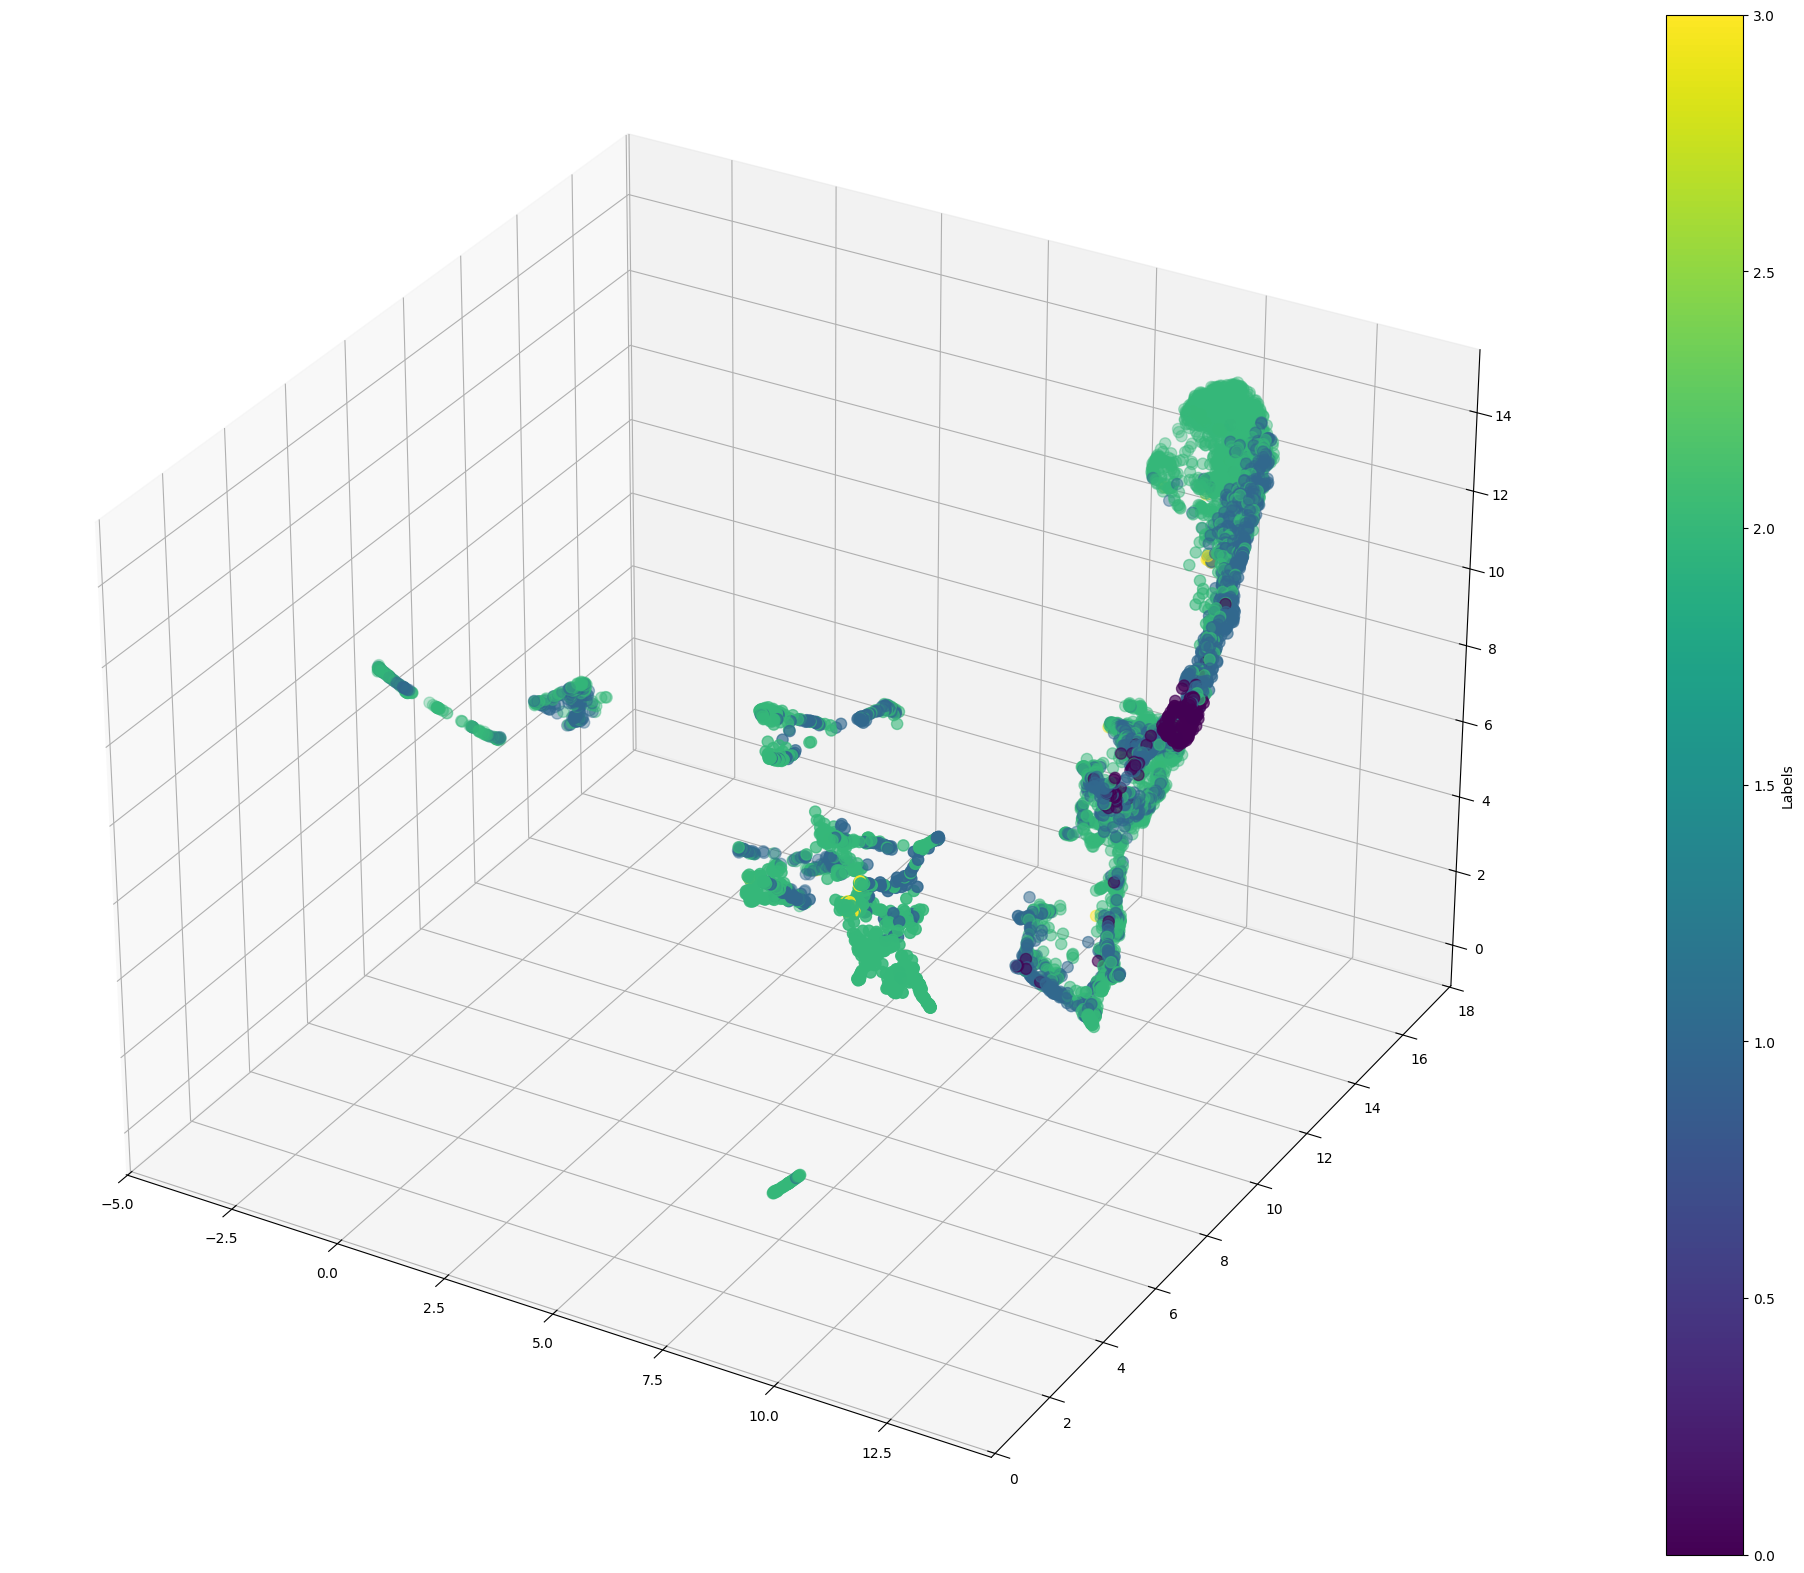

In [ ]:
import torch
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

data_path = "cdgpt/result/C12_e2_1_6000_result_feature.pt"
data_cdgpt = torch.load(data_path)

features = np.array([feat.numpy() for feat in data_cdgpt['feature']])
labels = np.array(data_cdgpt['prediction']) 

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

umap_model = umap.UMAP(n_components=3, random_state=42)
embedding_3d = umap_model.fit_transform(features_scaled)

fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=labels, cmap='viridis', s=65)
plt.colorbar(scatter, ax=ax, label='Labels')
plt.show()


### Save the classification results as a FASTA file

In [ ]:
import torch
import os

data = torch.load("cdgpt/C7_e1_1_9000_result_feature.pt")

sequences = data['sequences']
predictions = data['prediction']

output_dir = "3model_result"
os.makedirs(output_dir, exist_ok=True)

predicted_files = {
    0: "cdgpt_predict_hyena_seq.pt",
    1: "cdgpt_predict_ntv2_seq.pt",
    2: "cdgpt_predict_cdgpt_seq.pt",
    3: "cdgpt_predict_none_seq.pt"
}

classified_sequences = {i: [] for i in range(4)}

for sequence, pred in zip(sequences, predictions):
    classified_sequences[pred].append(sequence)

for key, filename in predicted_files.items():
    torch.save({"sequences": classified_sequences[key]}, os.path.join(output_dir, filename))
    print(f"Saved {len(classified_sequences[key])} sequences to {filename}")

# 
def save_sequences_to_fasta(sequences, output_fasta):
    with open(output_fasta, 'w', encoding='utf-8') as f:
        for idx, sequence in enumerate(sequences):
            f.write(f">sequence_{idx}\n")
            for i in range(0, len(sequence), 60):
                f.write(sequence[i:i+60] + "\n")
    print(f"Saved sequences to {output_fasta} in FASTA format.")

for key, filename in predicted_files.items():
    pt_file = os.path.join(output_dir, filename)
    data = torch.load(pt_file)
    output_fasta = os.path.join(output_dir, filename.replace(".pt", ".fasta"))
    save_sequences_to_fasta(data['sequences'], output_fasta)


Saved 176 sequences to cdgpt_predict_hyena_seq.pt
Saved 762 sequences to cdgpt_predict_ntv2_seq.pt
Saved 52 sequences to cdgpt_predict_cdgpt_seq.pt
Saved 0 sequences to cdgpt_predict_none_seq.pt
Saved sequences to 3model_result/cdgpt_predict_hyena_seq.fasta in FASTA format.
Saved sequences to 3model_result/cdgpt_predict_ntv2_seq.fasta in FASTA format.
Saved sequences to 3model_result/cdgpt_predict_cdgpt_seq.fasta in FASTA format.
Saved sequences to 3model_result/cdgpt_predict_none_seq.fasta in FASTA format.


/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_74558/4190532565.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load("cdgpt/C7_e1_1_9000_result_

## NTv2 results

In [2]:
import torch

data_path = "ntv2/result/C12_e2_ntv2_120_result_feature.pt"
data_ntv2 = torch.load(data_path)

/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_44374/2018351455.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_ntv2 = torch.load(data_path)


In [10]:
data_ntv2.keys()

dict_keys(['sequences', 'labels', 'feature', 'confidence', 'prediction'])

In [16]:
print(f"len is: {len(data['labels'])}")
print(f"table head is :{data.keys()}")
first_row = {key: value[4444] for key, value in data_ntv2.items()}
print("First row of data: ", first_row)

len is: 6948
table head is :dict_keys(['sequences', 'labels', 'feature', 'confidence', 'prediction'])
First row of data:  {'sequences': 'TTTTGATGGGGTTGTTTGATTTTTTTCTTGTAAATTTGTTTAAATTCTTTGTTGATTCTGGATATTAGCCCTTTGTCAGATGGGTAGATTGTAACAATTTTCTCCCATTCTGTAGGCTGCCTGTTCACTCTGATGGTAGTTTCTTTTGCTGTGCAGAAGCTCTTTAGTTTAATTAGATCCCATTTGTCTATTTTGGCTTTTGTTGCCATTACTTTTGGTGTTTTAGTCATGAAGTCCTTGCCCATGCCTATGTCCTGAATGGTATGCCTAGGTTTTCTTCTAGGGTTTTTATGGTTTTAGATCTAACATTTAAGTCTTTAATCCATATTGAATTAATTTTTGTATAAGTTGTAAGGAAGGGATCCAGTTTCAGCTTTCTCCATATGGCTAGCCAGTTTTCCCAGCACCATTTATTAAATAGGGAATCCTTTCCCCATTTCTTGTTTTTGTCAGGTTTGTCAAAGATCAGATGGTTGTAGATGTGTGGTATTATTTCTGAG', 'labels': 1, 'feature': array([ 0.03501644,  0.19122157, -0.08894795, ..., -0.1561227 ,
        0.2233518 , -0.03666079], dtype=float32), 'confidence': 0.35853397846221924, 'prediction': 1}


In [ ]:
data_ntv2['prediction'][:]

[2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,


/opt/anaconda3/envs/bio/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


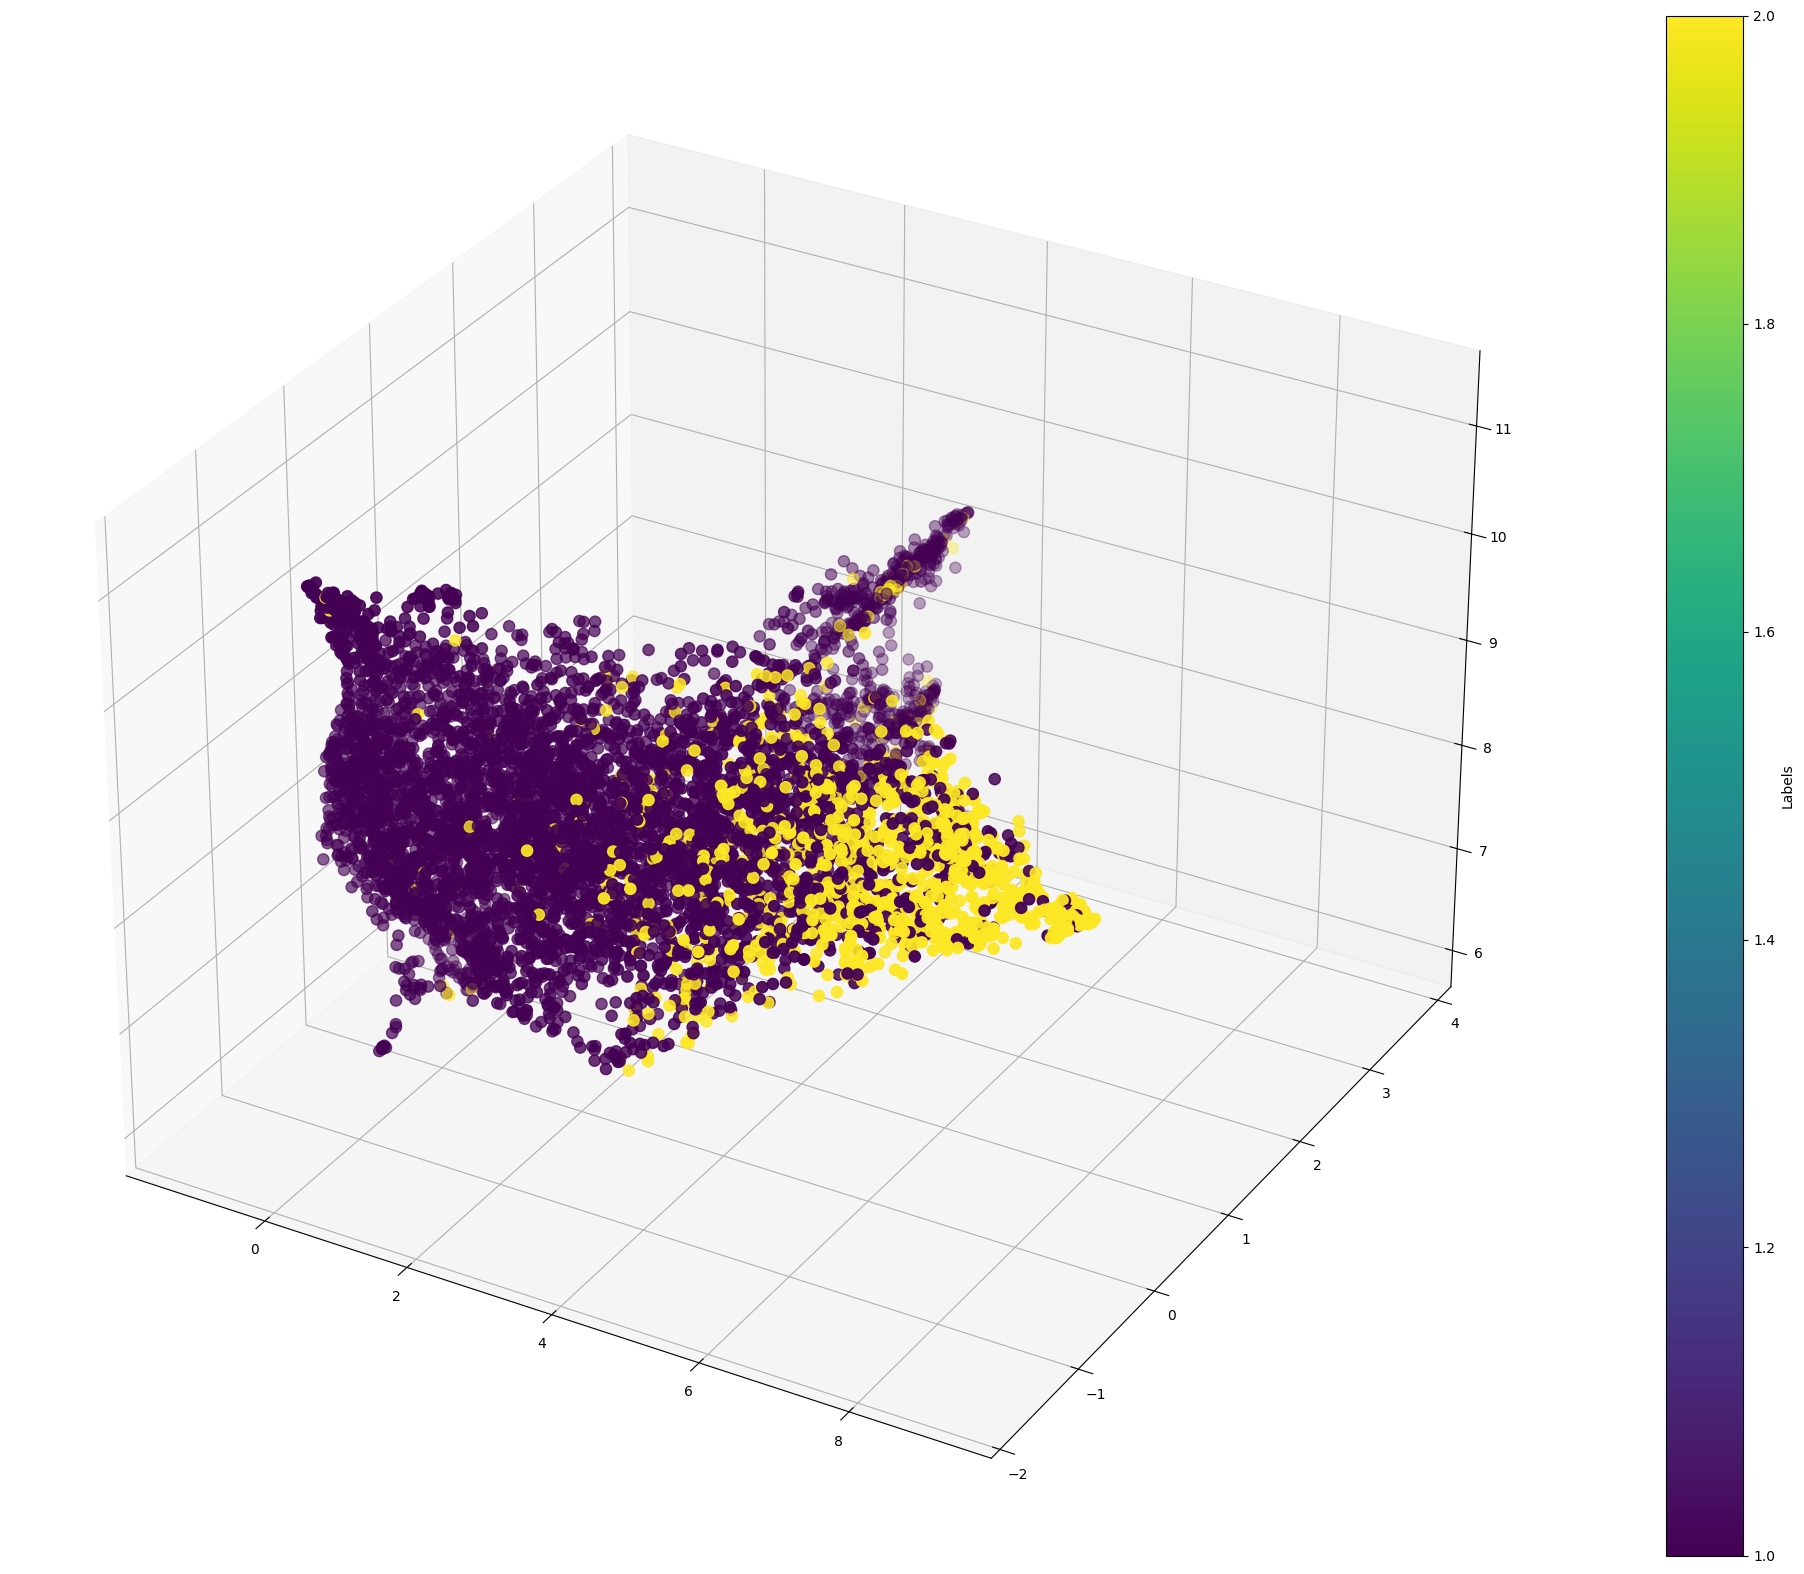

In [ ]:

import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

features = data_ntv2['feature']  
labels = np.array(data_ntv2['prediction']) 

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

umap_model = umap.UMAP(n_components=3, random_state=42)
embedding_3d = umap_model.fit_transform(features_scaled)

fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=labels, cmap='viridis', s=65)
plt.colorbar(scatter, ax=ax, label='Labels')

plt.show()


In [ ]:
import torch
import os

sequences = data['sequences']
predictions = data['prediction']

output_dir = "ntv2/3model_result"
os.makedirs(output_dir, exist_ok=True)

predicted_files = {
    0: "ntv2_predict_hyena_seq.pt",
    1: "ntv2_predict_ntv2_seq.pt",
    2: "ntv2_predict_cdgpt_seq.pt",
    3: "ntv2_predict_none_seq.pt"
}

classified_sequences = {i: [] for i in range(4)}

for sequence, pred in zip(sequences, predictions):
    classified_sequences[pred].append(sequence)

for key, filename in predicted_files.items():
    torch.save({"sequences": classified_sequences[key]}, os.path.join(output_dir, filename))
    print(f"Saved {len(classified_sequences[key])} sequences to {filename}")

def save_sequences_to_fasta(sequences, output_fasta):
    with open(output_fasta, 'w', encoding='utf-8') as f:
        for idx, sequence in enumerate(sequences):
            f.write(f">sequence_{idx}\n")
            for i in range(0, len(sequence), 60):
                f.write(sequence[i:i+60] + "\n")
    print(f"Saved sequences to {output_fasta} in FASTA format.")

for key, filename in predicted_files.items():
    pt_file = os.path.join(output_dir, filename)
    data = torch.load(pt_file)
    output_fasta = os.path.join(output_dir, filename.replace(".pt", ".fasta"))
    save_sequences_to_fasta(data['sequences'], output_fasta)


Saved 201 sequences to ntv2_predict_hyena_seq.pt
Saved 784 sequences to ntv2_predict_ntv2_seq.pt
Saved 5 sequences to ntv2_predict_cdgpt_seq.pt
Saved 0 sequences to ntv2_predict_none_seq.pt
Saved sequences to ntv2/3model_result/ntv2_predict_hyena_seq.fasta in FASTA format.
Saved sequences to ntv2/3model_result/ntv2_predict_ntv2_seq.fasta in FASTA format.
Saved sequences to ntv2/3model_result/ntv2_predict_cdgpt_seq.fasta in FASTA format.
Saved sequences to ntv2/3model_result/ntv2_predict_none_seq.fasta in FASTA format.


/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_74558/574732350.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(pt_file)


## Hyena results

In [3]:
import torch

data_path = "hyena/result/C12_hyena_e2_140_result_feature.pt"
data_hyena = torch.load(data_path)

/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_44374/1507155242.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_hyena = torch.load(data_path)


In [ ]:
print(f"len is: {len(data_hyena['labels'])}")
print(f"table head is :{data_hyena.keys()}")
first_row = {key: value[0] for key, value in data_hyena.items()}
print("First row of data: ", first_row)

len is: 6948
table head is :dict_keys(['sequences', 'labels', 'feature', 'confidence', 'prediction'])
First row of data:  {'sequences': 'AAGACAGGTTGGCATCGGGCTGGTGCTTTTCTGCTTCTACTTAAATAGGAGAGGATTTGGTCAAACTTGGTCCTTGGGACAAGGAGCTGTTTTGGACAAACGGTTTACGGAAGGTGAGGCTGGGTATTTTAAGAAGGGAGGTGAGAAGTGAGAGACCTGGAATCTGGTCCTTGTAATCGGTCATCTTGCAACATGGACTTGACTGTTGTGGAAATGGTCTACACCTCAGTTTCCTTTTTACCACAAGCTCTTCCCTCCATCTCTGTCGACACATTTCCCTCCTCTTGCTCCAGCCTCTGCTTATTTCAGGGGCTCAGTTTTCTCAAGATGGCCCCATGAAACTTCCTTGCCACAGAATGCTTCTCTGGATGCTATATCAATCGATTACATGTTAGTATGAATTTAGCTAATACACTACCTCCACATGTGACTGTACACTCAAAGTATCCCAGCAGAGGCACTCTCCCAGGTGCAACAAGATGAAACAGTCAGTTTCGGGG', 'labels': 0, 'feature': array([[-8.0746895e-01, -1.1530075e+00, -1.0035812e+00, -1.6765858e+00,
        -1.4804186e-01, -1.0078344e+00,  7.6705635e-01, -7.5651631e-02,
        -1.7531323e+00,  7.2458041e-01, -1.2263169e+00,  9.9757016e-01,
         5.4196268e-01,  7.0811564e-01, -1.7458911e-01, -5.2940053e-01,
         1.4057842e-03,  1.0302941e+00,  9.11989

In [ ]:
len(data_hyena['sequences'][0])

500

/opt/anaconda3/envs/bio/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


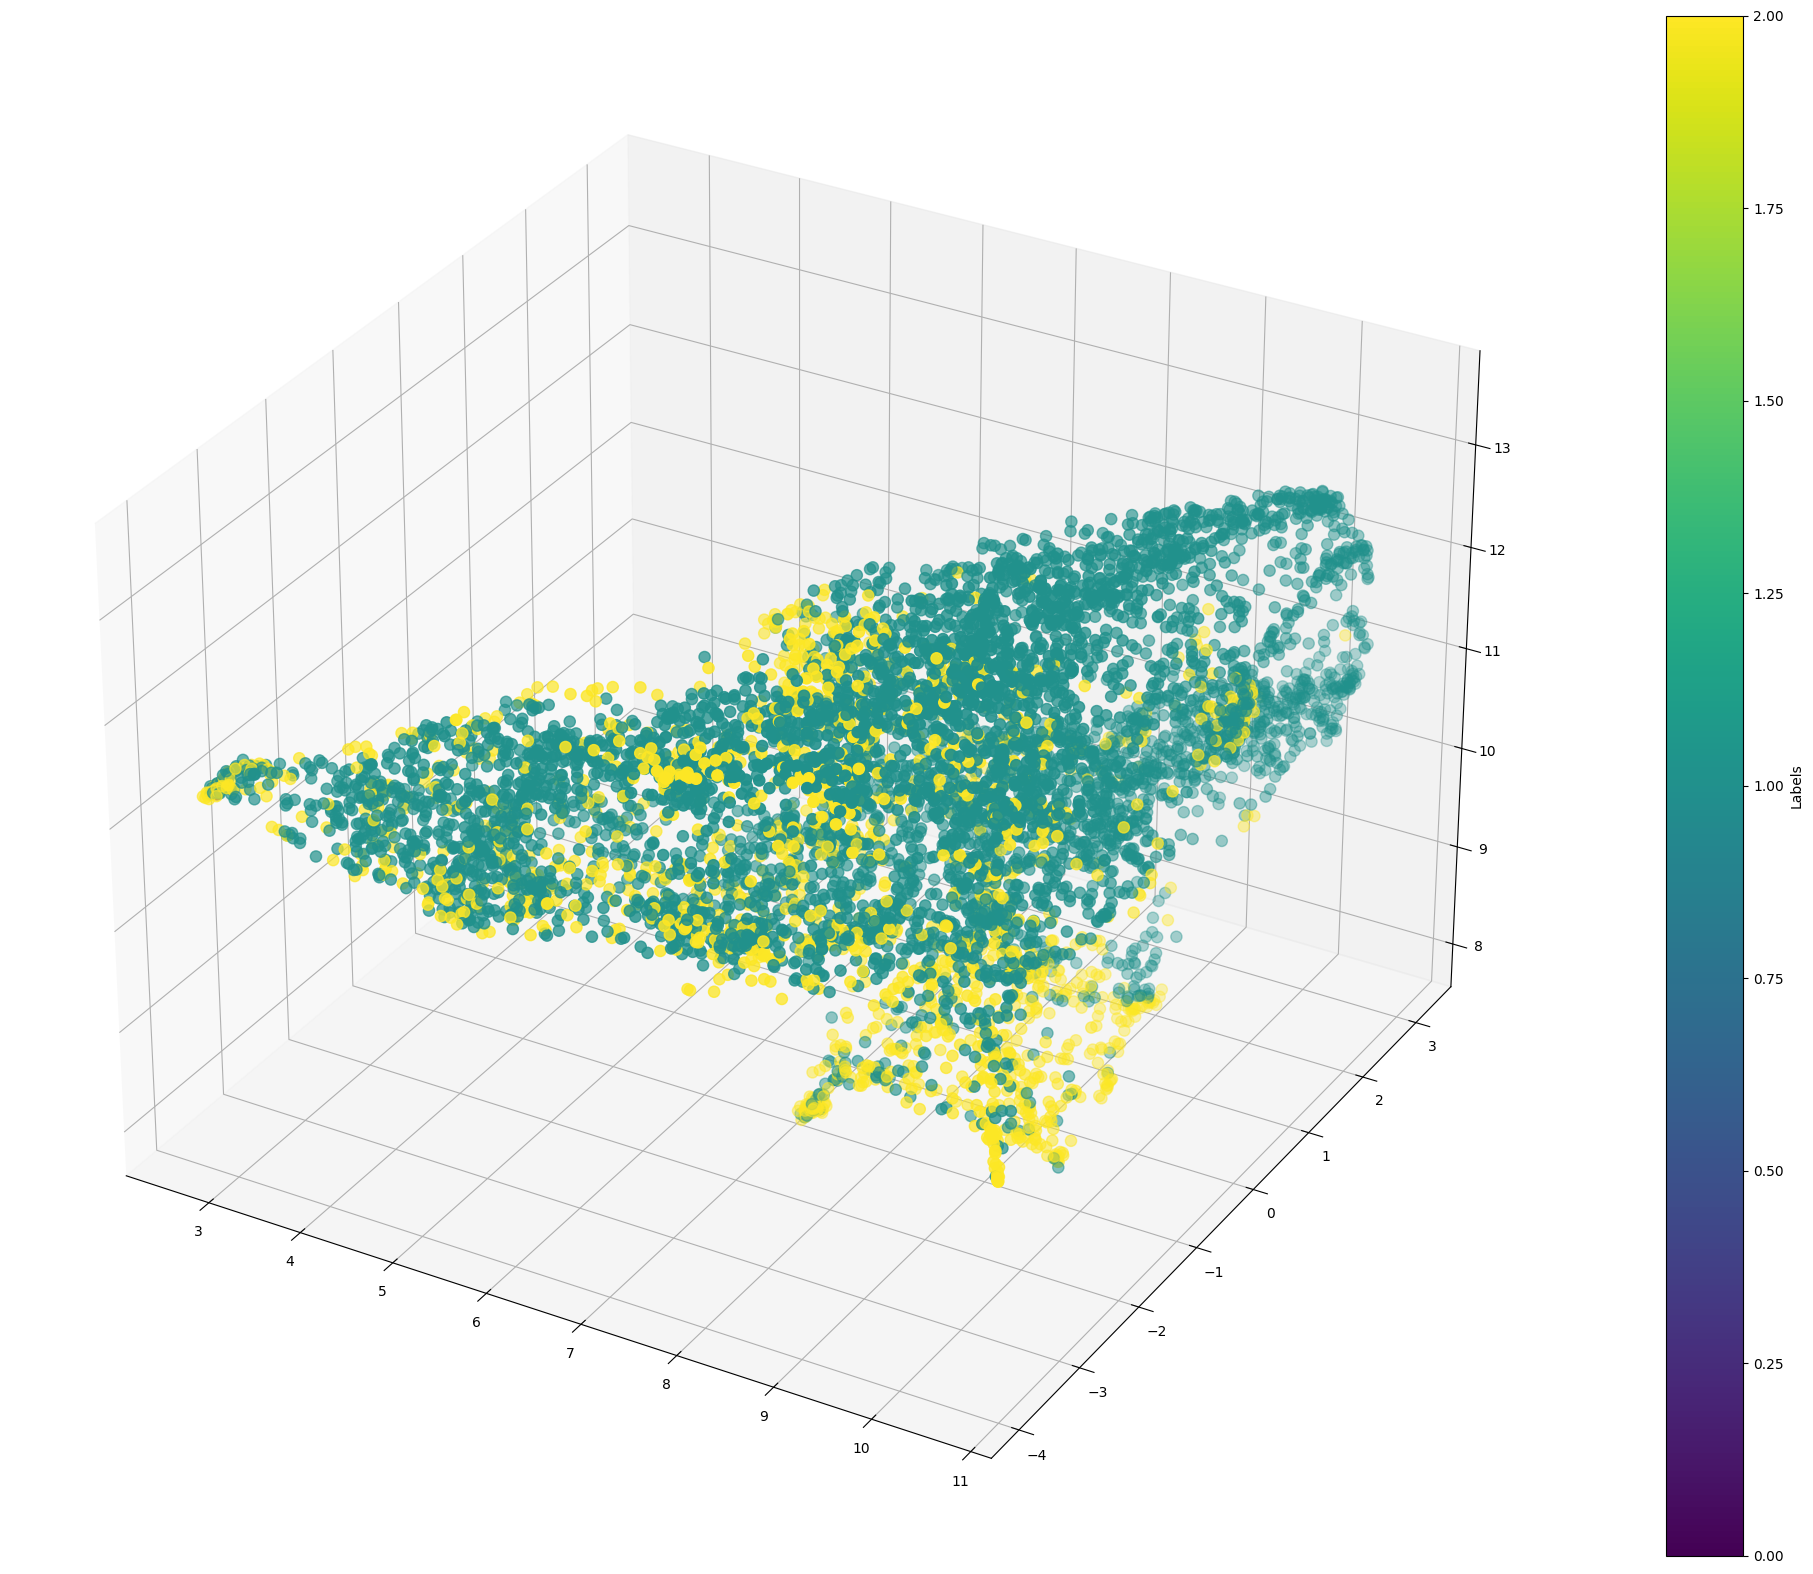

In [ ]:

import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

features = np.array(data_hyena['feature'])  

features = features.reshape(features.shape[0], -1)

labels = np.array(data_hyena['prediction']) 

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

umap_model = umap.UMAP(n_components=3, random_state=42)
embedding_3d = umap_model.fit_transform(features_scaled)

fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=labels, cmap='viridis', s=65)
plt.colorbar(scatter, ax=ax, label='Labels')
plt.show()


In [ ]:
import torch
import os

sequences = data['sequences']
predictions = data['prediction']

output_dir = "3model_result"
os.makedirs(output_dir, exist_ok=True)

predicted_files = {
    0: "hyena_predict_hyena_seq.pt",
    1: "hyena_predict_ntv2_seq.pt",
    2: "hyena_predict_cdgpt_seq.pt",
    3: "hyena_predict_none_seq.pt"
}

classified_sequences = {i: [] for i in range(4)}

for sequence, pred in zip(sequences, predictions):
    classified_sequences[pred].append(sequence)

for key, filename in predicted_files.items():
    torch.save({"sequences": classified_sequences[key]}, os.path.join(output_dir, filename))
    print(f"Saved {len(classified_sequences[key])} sequences to {filename}")

def save_sequences_to_fasta(sequences, output_fasta):
    with open(output_fasta, 'w', encoding='utf-8') as f:
        for idx, sequence in enumerate(sequences):
            f.write(f">sequence_{idx}\n")
            for i in range(0, len(sequence), 60):
                f.write(sequence[i:i+60] + "\n")
    print(f"Saved sequences to {output_fasta} in FASTA format.")

for key, filename in predicted_files.items():
    pt_file = os.path.join(output_dir, filename)
    data = torch.load(pt_file)
    output_fasta = os.path.join(output_dir, filename.replace(".pt", ".fasta"))
    save_sequences_to_fasta(data['sequences'], output_fasta)


Saved 179 sequences to hyena_predict_hyena_seq.pt
Saved 809 sequences to hyena_predict_ntv2_seq.pt
Saved 2 sequences to hyena_predict_cdgpt_seq.pt
Saved 0 sequences to hyena_predict_none_seq.pt
Saved sequences to 3model_result/hyena_predict_hyena_seq.fasta in FASTA format.
Saved sequences to 3model_result/hyena_predict_ntv2_seq.fasta in FASTA format.
Saved sequences to 3model_result/hyena_predict_cdgpt_seq.fasta in FASTA format.
Saved sequences to 3model_result/hyena_predict_none_seq.fasta in FASTA format.


/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_74558/1271622939.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(pt_file)


/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_30612/1413392969.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(path)
/var/folders/69/y_h_

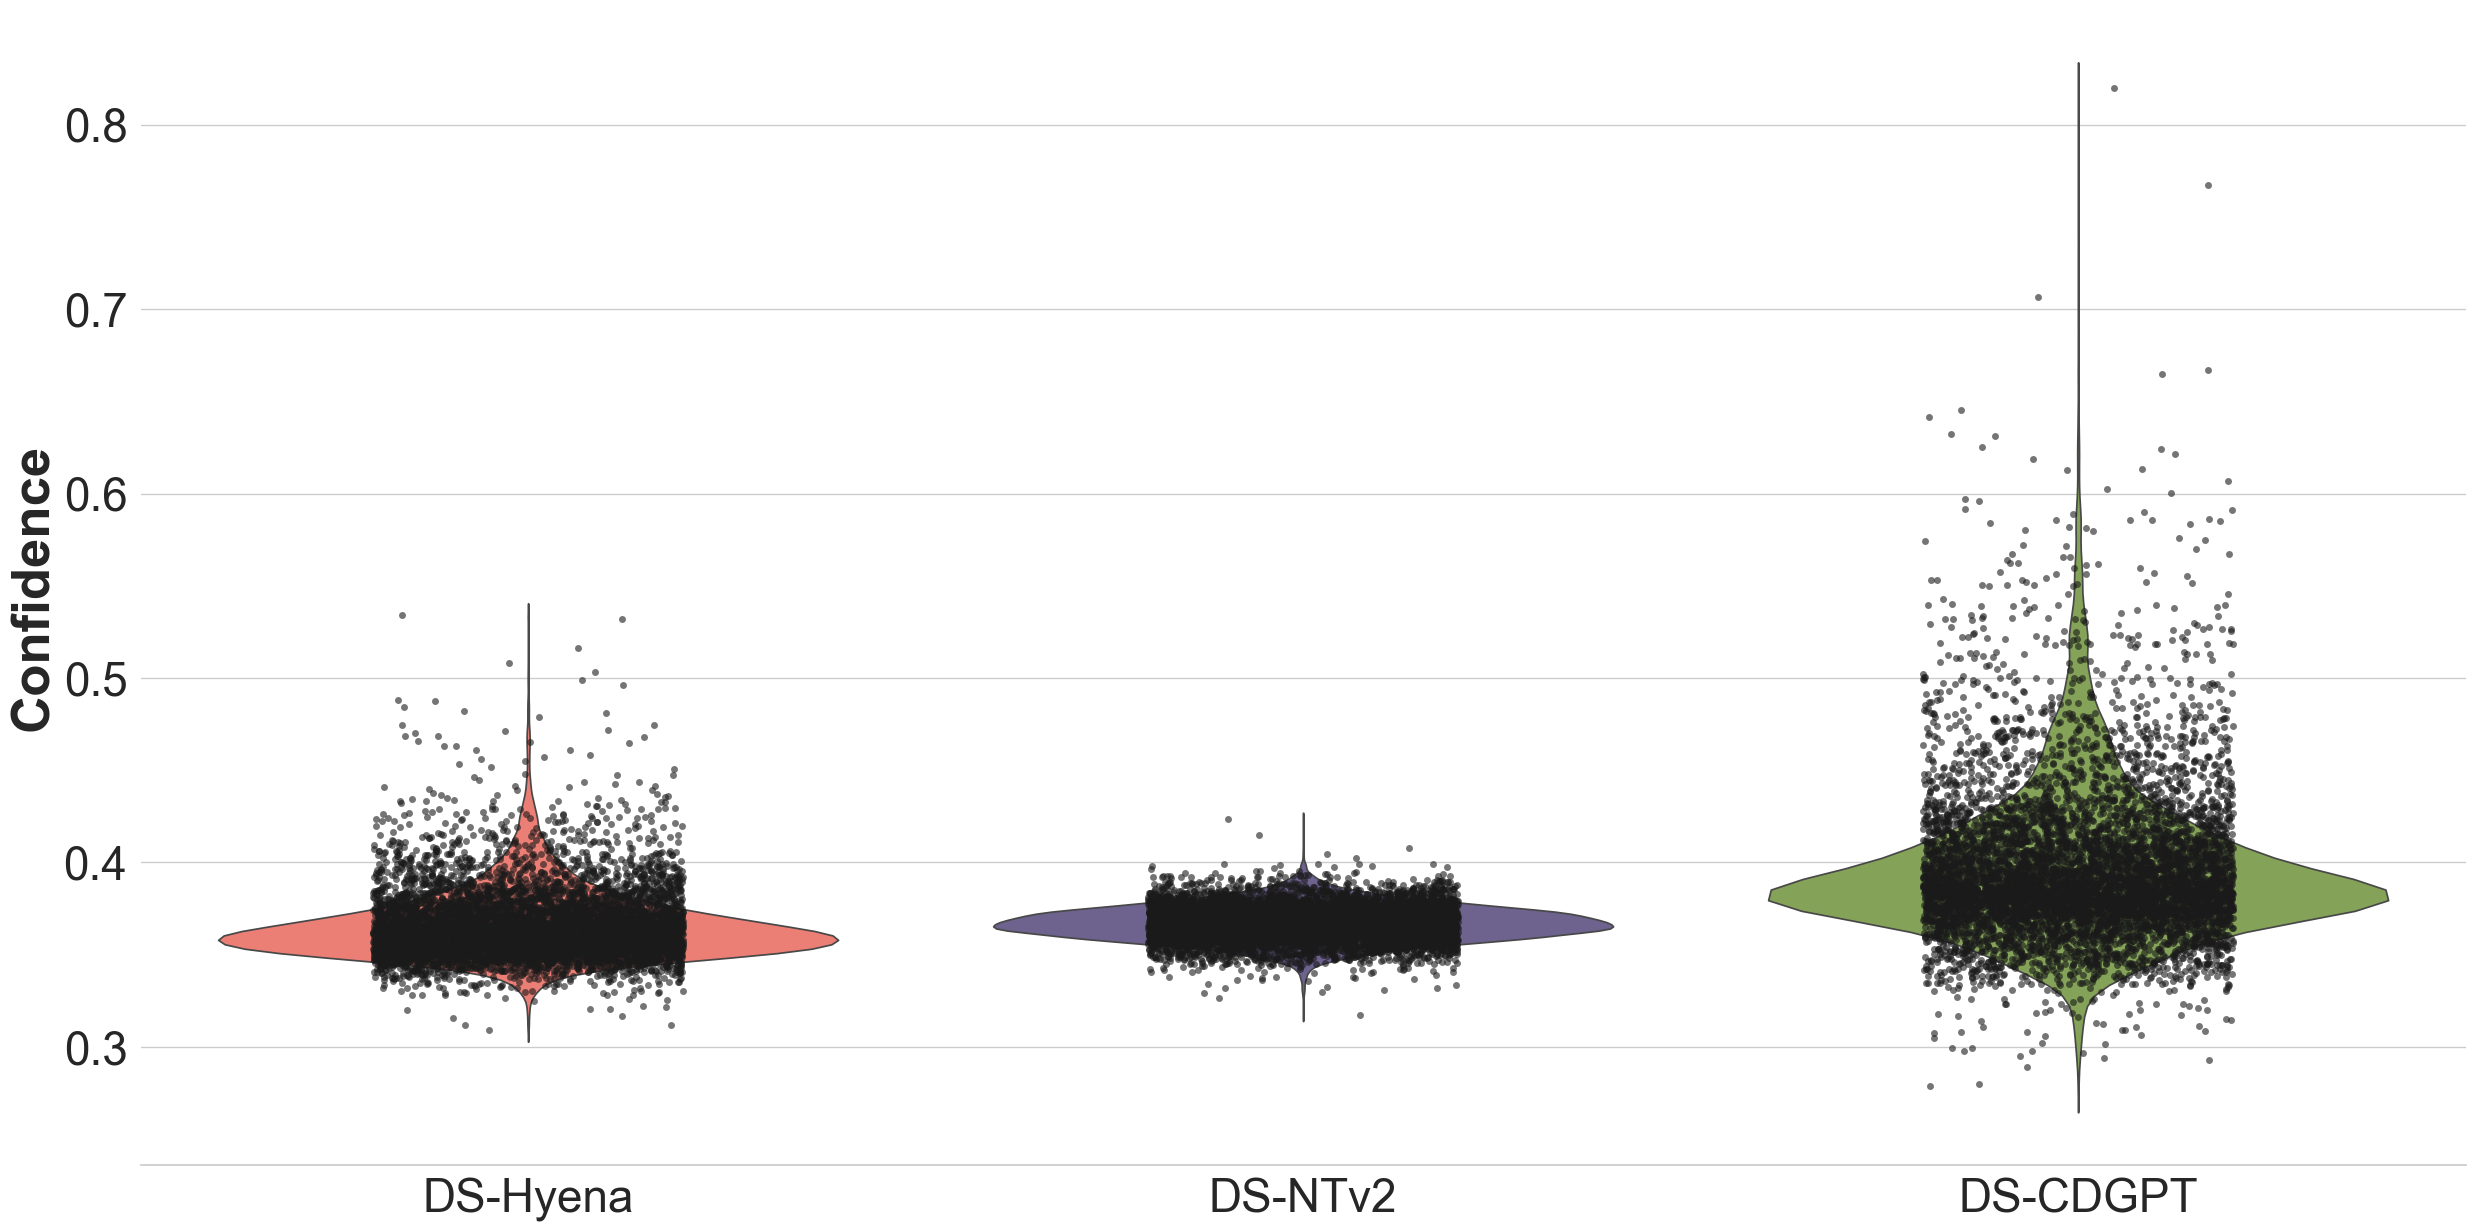

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_paths = [
    ("hyena/result/C12_hyena_e2_140_result_feature.pt", "DS-Hyena"),
    ("ntv2/result/C12_e2_ntv2_120_result_feature.pt", "DS-NTv2"),
    ("cdgpt/result/C12_e2_1_6000_result_feature.pt", "DS-CDGPT")
]

confidence_data = pd.DataFrame()

for path, model_name in data_paths:
    data = torch.load(path)
    confidence = data['confidence']
    temp_df = pd.DataFrame({
        'Confidence': confidence,
        'Model': [model_name] * len(confidence)
    })
    confidence_data = pd.concat([confidence_data, temp_df], ignore_index=True)

sns.set(style="whitegrid", palette="pastel", font_scale=3)

plt.figure(figsize=(30, 15))
colors = ["#FF6F61", "#6B5B95", "#88B04B"]
sns.violinplot(x="Model", y="Confidence", data=confidence_data, inner=None, palette=colors)
sns.stripplot(x="Model", y="Confidence", data=confidence_data, color="k", size=5, jitter=0.2, alpha=0.6)

plt.xlabel("", fontsize=14, weight='bold')
plt.ylabel("Confidence", fontsize=38, weight='bold')

sns.despine(left=True)
plt.show()

/opt/anaconda3/envs/bio/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/envs/bio/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/envs/bio/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_44374/767226367.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


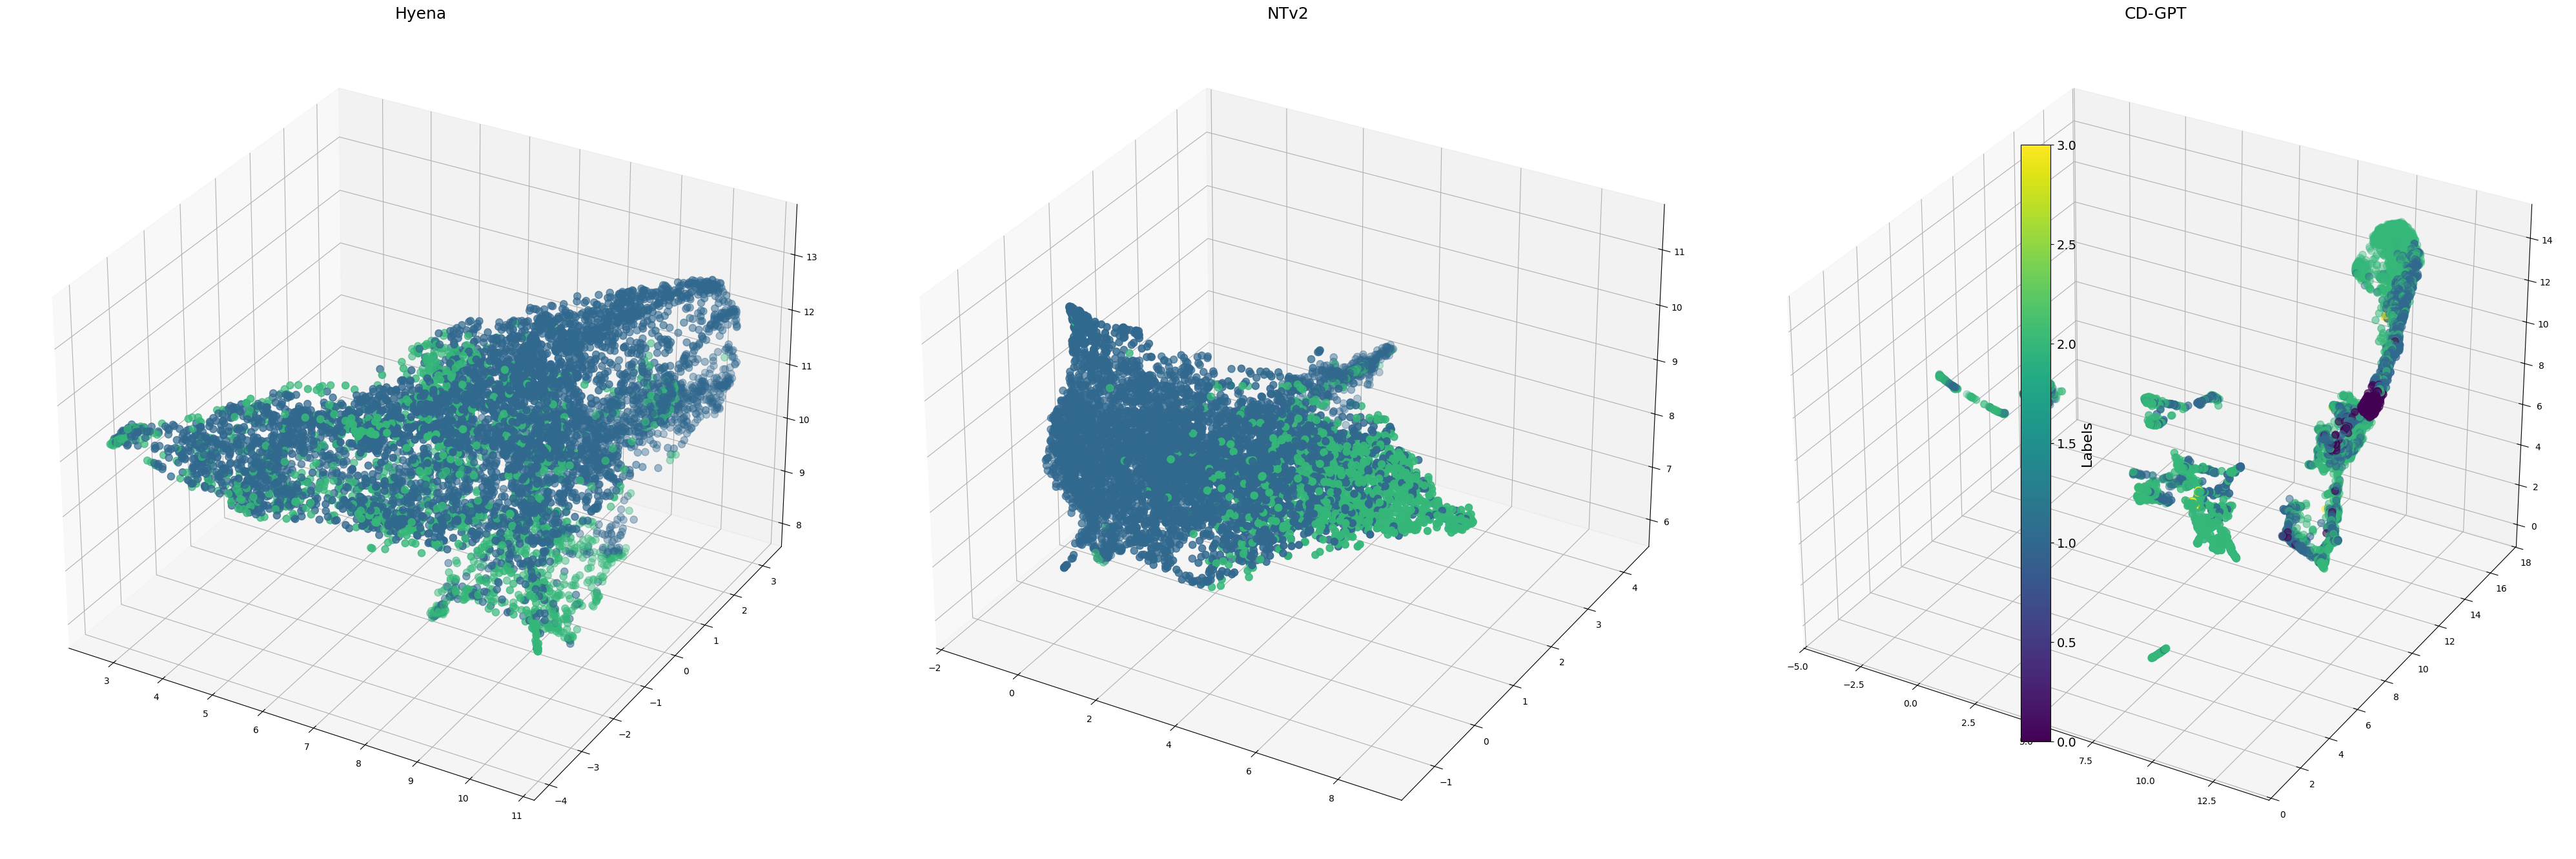

In [ ]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

features1 = np.array(data_hyena['feature'])
labels1 = np.array(data_hyena['prediction'])

features2 = np.array(data_ntv2['feature'])
labels2 = np.array(data_ntv2['prediction'])

features3 = np.array(data_cdgpt['feature'])
labels3 = np.array(data_cdgpt['prediction'])

if len(features1.shape) == 3:
    features1 = features1.reshape(features1.shape[0], -1)
if len(features2.shape) == 3:
    features2 = features2.reshape(features2.shape[0], -1)
if len(features3.shape) == 3:
    features3 = features3.reshape(features3.shape[0], -1)

scaler = StandardScaler()
features1_scaled = scaler.fit_transform(features1)
features2_scaled = scaler.fit_transform(features2)
features3_scaled = scaler.fit_transform(features3)

umap_model1 = umap.UMAP(n_components=3, random_state=42)
embedding_3d_1 = umap_model1.fit_transform(features1_scaled)

umap_model2 = umap.UMAP(n_components=3, random_state=42)
embedding_3d_2 = umap_model2.fit_transform(features2_scaled)

umap_model3 = umap.UMAP(n_components=3, random_state=42)
embedding_3d_3 = umap_model3.fit_transform(features3_scaled)

vmin = min(labels1.min(), labels2.min(), labels3.min())
vmax = max(labels1.max(), labels2.max(), labels3.max())

fig = plt.figure(figsize=(40, 15))

ax1 = fig.add_subplot(131, projection='3d')  
scatter1 = ax1.scatter(embedding_3d_1[:, 0], embedding_3d_1[:, 1], embedding_3d_1[:, 2],
                       c=labels1, cmap='viridis', s=65, vmin=vmin, vmax=vmax)
ax1.set_title("Hyena", fontsize=18)

ax2 = fig.add_subplot(132, projection='3d')  
scatter2 = ax2.scatter(embedding_3d_2[:, 0], embedding_3d_2[:, 1], embedding_3d_2[:, 2],
                       c=labels2, cmap='viridis', s=65, vmin=vmin, vmax=vmax)
ax2.set_title("NTv2", fontsize=18)

ax3 = fig.add_subplot(133, projection='3d')  
scatter3 = ax3.scatter(embedding_3d_3[:, 0], embedding_3d_3[:, 1], embedding_3d_3[:, 2],
                       c=labels3, cmap='viridis', s=65, vmin=vmin, vmax=vmax)
ax3.set_title("CD-GPT", fontsize=18)

cbar = fig.colorbar(scatter1, ax=[ax1, ax2, ax3], location='right', shrink=0.8, pad=0.1)
cbar.set_label('Labels', fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_44374/1384789215.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


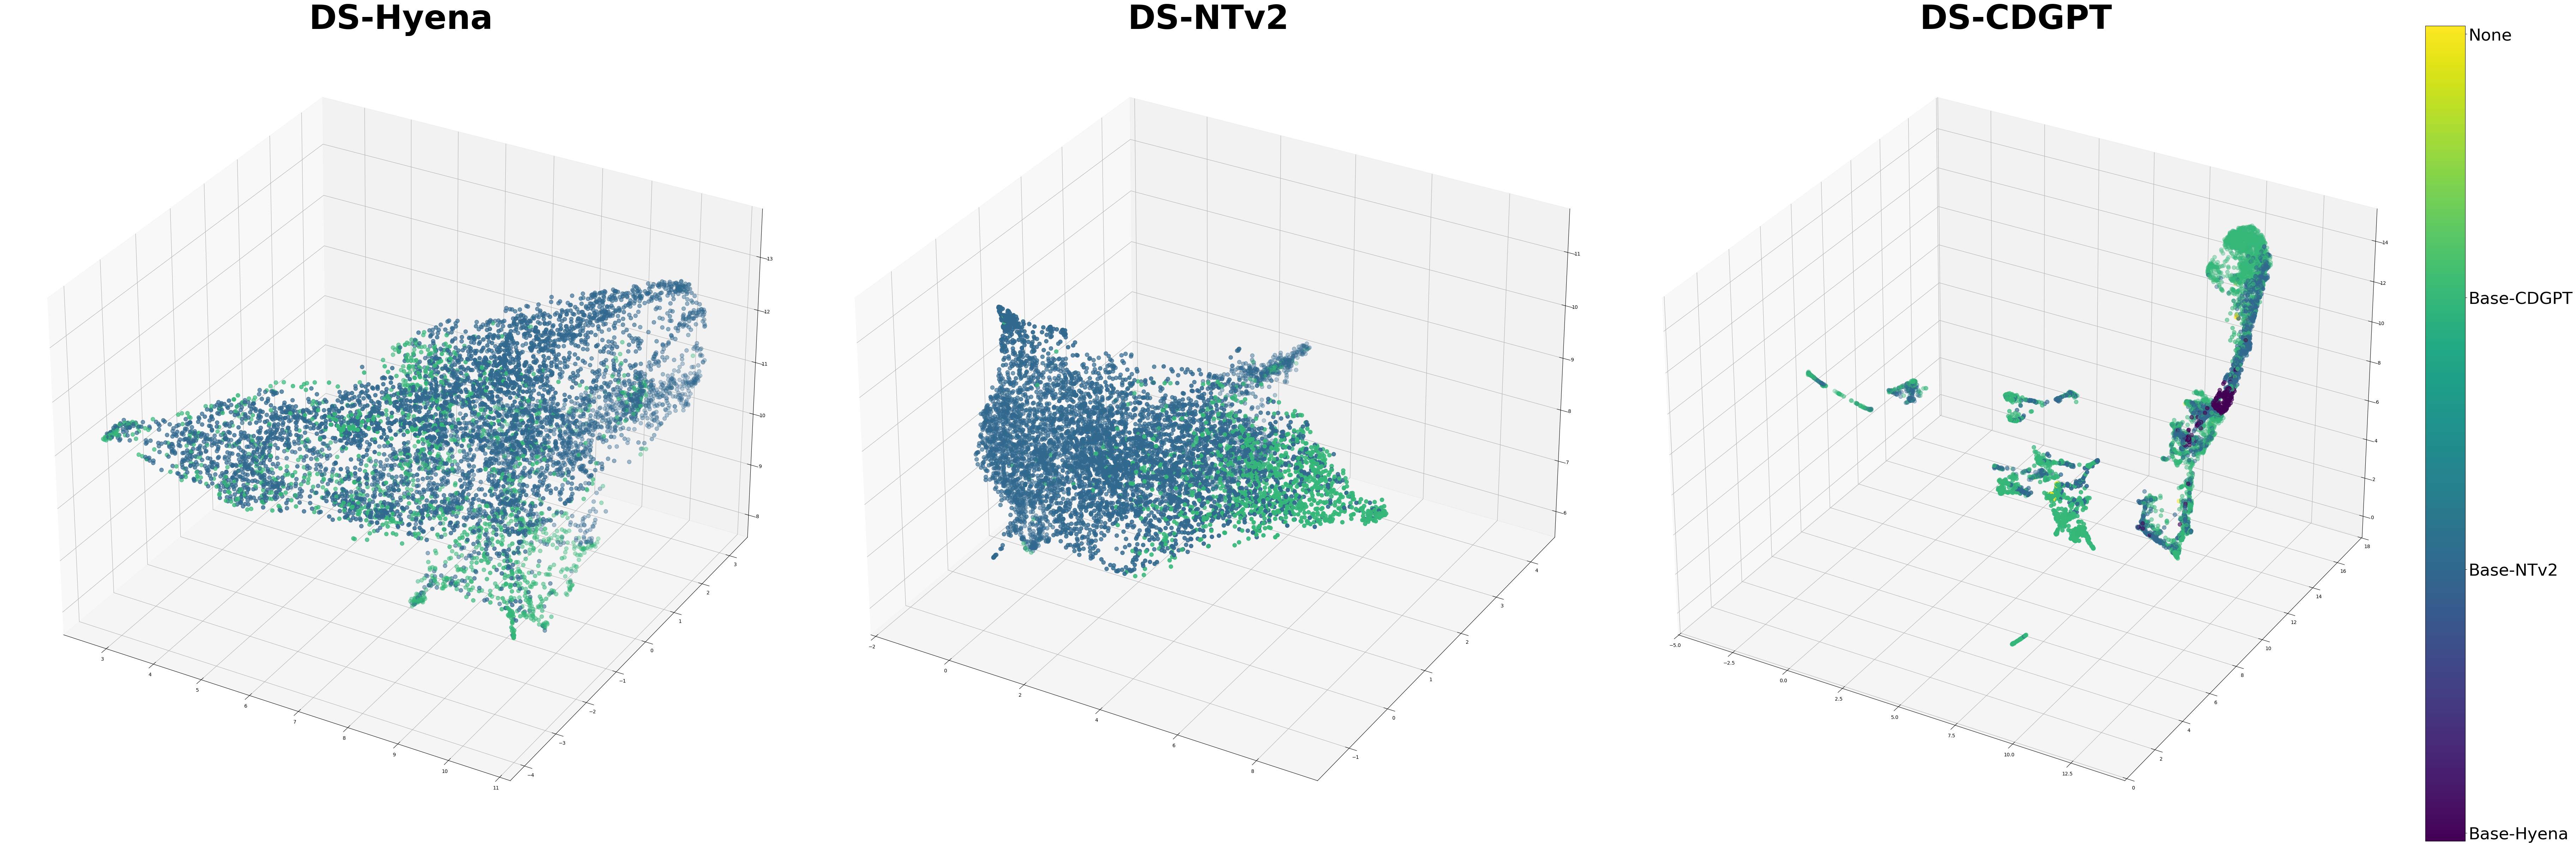

In [ ]:
from matplotlib import gridspec

fig = plt.figure(figsize=(90, 30))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.02) 

ax1 = fig.add_subplot(gs[0], projection='3d')
scatter1 = ax1.scatter(embedding_3d_1[:, 0], embedding_3d_1[:, 1], embedding_3d_1[:, 2],
                       c=labels1, cmap='viridis', s=65, vmin=vmin, vmax=vmax)
ax1.set_title("DS-Hyena", fontsize=68, weight='bold')


ax2 = fig.add_subplot(gs[1], projection='3d')
scatter2 = ax2.scatter(embedding_3d_2[:, 0], embedding_3d_2[:, 1], embedding_3d_2[:, 2],
                       c=labels2, cmap='viridis', s=65, vmin=vmin, vmax=vmax)
ax2.set_title("DS-NTv2", fontsize=68, weight='bold')

ax3 = fig.add_subplot(gs[2], projection='3d')
scatter3 = ax3.scatter(embedding_3d_3[:, 0], embedding_3d_3[:, 1], embedding_3d_3[:, 2],
                       c=labels3, cmap='viridis', s=65, vmin=vmin, vmax=vmax)
ax3.set_title("DS-CDGPT", fontsize=68, weight='bold')

# Colorbar in column 4
cbar_ax = fig.add_subplot(gs[3]) 
cbar = fig.colorbar(scatter1, cax=cbar_ax, shrink=0.5, pad=0.02)  
cbar.ax.tick_params(labelsize=30)

cbar.set_ticks([0.03, 1, 2, 2.97]) 
cbar.set_ticklabels(['Base-Hyena', 'Base-NTv2', 'Base-CDGPT', 'None'])  # Custom tag

cbar.ax.tick_params(labelsize=34)

plt.tight_layout()
plt.show()

#### dynamic selection model on TP, TN, FP, FN data and save it to files

In [1]:
import torch

hyena_result_file = 'hyena/result/C12_hyena_e2_140_result_feature.pt'
ntv2_result_file = 'ntv2/result/C12_e2_ntv2_120_result_feature.pt'
cdgpt_result_file = 'cdgpt/result/C12_e2_1_6000_result_feature.pt'

# Define the mapping between predicted values and categories
prediction_mapping = {0: 'hyena', 1: 'ntv2', 2: 'cdgpt', 3: 'None'}

category_counts = {'hyena': 0, 'ntv2': 0, 'cdgpt': 0, 'None': 0}
hy_counts = {'hy_1_right': 0, 'hy_1_wrong': 0, 'hy_0_right': 0, 'hy_0_wrong': 0}
nt_counts = {'nt_1_right': 0, 'nt_1_wrong': 0, 'nt_0_right': 0, 'nt_0_wrong': 0}
cd_counts = {'cd_1_right': 0, 'cd_1_wrong': 0, 'cd_0_right': 0, 'cd_0_wrong': 0}
none_counts = {'none_1_right': 0, 'none_1_wrong': 0, 'none_0_right': 0, 'none_0_wrong': 0}

hy_files = {'hy_1_right': [], 'hy_1_wrong': [], 'hy_0_right': [], 'hy_0_wrong': []}
nt_files = {'nt_1_right': [], 'nt_1_wrong': [], 'nt_0_right': [], 'nt_0_wrong': []}
cd_files = {'cd_1_right': [], 'cd_1_wrong': [], 'cd_0_right': [], 'cd_0_wrong': []}
none_files = {'none_1_right': [], 'none_1_wrong': [], 'none_0_right': [], 'none_0_wrong': []}

file_a = torch.load(ntv2_result_file)
file_b = torch.load('../e1/step9_soft_labels_dataset/merged_soft_label_and_models_prediction_test_dataset.pt')

a_sequences = file_a['sequences']
a_predictions = file_a['prediction']
a_labels = file_a['labels']
a_features = file_a['feature']
a_confidences = file_a['confidence']

b_sequence = file_b['sequence']
b_label = file_b['label']
b_data = {
    'hy': {
        'prediction': file_b['hy_prediction'],
        'label': file_b['hy_label']
    },
    'nt': {
        'prediction': file_b['nt_prediction'],
        'label': file_b['nt_label']
    },
    'cd': {
        'prediction': file_b['cd_prediction'],
        'label': file_b['cd_label']
    }
}

for idx in range(len(a_sequences)):
    sequence = a_sequences[idx]
    prediction = a_predictions[idx]
    label = a_labels[idx]
    feature = a_features[idx]
    confidence = a_confidences[idx]

    category = prediction_mapping.get(prediction, 'Unknown')
    if category == 'Unknown':
        continue
    category_counts[category] += 1

    b_idx = idx
    b_pred = None
    b_lab = None

    new_data = {
        'sequences': sequence,
        'labels': label,
        'feature': feature,
        'confidence': confidence,
        'prediction': prediction,
        'base_model_prediction': None
    }

    if category == 'hyena':
        b_pred = b_data['hy']['prediction'][b_idx]
        b_lab = b_data['hy']['label'][b_idx]
        new_data['base_model_prediction'] = b_pred

        if b_lab == 1:
            if b_pred == b_lab:
                hy_counts['hy_1_right'] += 1
                hy_files['hy_1_right'].append(new_data)
            else:
                hy_counts['hy_1_wrong'] += 1
                hy_files['hy_1_wrong'].append(new_data)
        elif b_lab == 0:
            if b_pred == b_lab:
                hy_counts['hy_0_right'] += 1
                hy_files['hy_0_right'].append(new_data)
            else:
                hy_counts['hy_0_wrong'] += 1
                hy_files['hy_0_wrong'].append(new_data)

    elif category == 'ntv2':
        b_pred = b_data['nt']['prediction'][b_idx]
        b_lab = b_data['nt']['label'][b_idx]
        new_data['base_model_prediction'] = b_pred

        if b_lab == 1:
            if b_pred == b_lab:
                nt_counts['nt_1_right'] += 1
                nt_files['nt_1_right'].append(new_data)
            else:
                nt_counts['nt_1_wrong'] += 1
                nt_files['nt_1_wrong'].append(new_data)
        elif b_lab == 0:
            if b_pred == b_lab:
                nt_counts['nt_0_right'] += 1
                nt_files['nt_0_right'].append(new_data)
            else:
                nt_counts['nt_0_wrong'] += 1
                nt_files['nt_0_wrong'].append(new_data)

    elif category == 'cdgpt':
        b_pred = b_data['cd']['prediction'][b_idx]
        b_lab = b_data['cd']['label'][b_idx]
        new_data['base_model_prediction'] = b_pred

        if b_lab == 1:
            if b_pred == b_lab:
                cd_counts['cd_1_right'] += 1
                cd_files['cd_1_right'].append(new_data)
            else:
                cd_counts['cd_1_wrong'] += 1
                cd_files['cd_1_wrong'].append(new_data)
        elif b_lab == 0:
            if b_pred == b_lab:
                cd_counts['cd_0_right'] += 1
                cd_files['cd_0_right'].append(new_data)
            else:
                cd_counts['cd_0_wrong'] += 1
                cd_files['cd_0_wrong'].append(new_data)

    elif category == 'None':
        b_pred = b_data['nt']['prediction'][b_idx]
        b_lab = b_data['nt']['label'][b_idx]
        new_data['base_model_prediction'] = b_pred

        if b_lab == 1:
            if b_pred == b_lab:
                none_counts['none_1_right'] += 1
                none_files['none_1_right'].append(new_data)
            else:
                none_counts['none_1_wrong'] += 1
                none_files['none_1_wrong'].append(new_data)
        elif b_lab == 0:
            if b_pred == b_lab:
                none_counts['none_0_right'] += 1
                none_files['none_0_right'].append(new_data)
            else:
                none_counts['none_0_wrong'] += 1
                none_files['none_0_wrong'].append(new_data)

torch.save(hy_files['hy_1_right'], 'hy_1_right_file.pt')
torch.save(hy_files['hy_1_wrong'], 'hy_1_wrong_file.pt')
torch.save(hy_files['hy_0_right'], 'hy_0_right_file.pt')
torch.save(hy_files['hy_0_wrong'], 'hy_0_wrong_file.pt')

torch.save(nt_files['nt_1_right'], 'nt_1_right_file.pt')
torch.save(nt_files['nt_1_wrong'], 'nt_1_wrong_file.pt')
torch.save(nt_files['nt_0_right'], 'nt_0_right_file.pt')
torch.save(nt_files['nt_0_wrong'], 'nt_0_wrong_file.pt')

torch.save(cd_files['cd_1_right'], 'cd_1_right_file.pt')
torch.save(cd_files['cd_1_wrong'], 'cd_1_wrong_file.pt')
torch.save(cd_files['cd_0_right'], 'cd_0_right_file.pt')
torch.save(cd_files['cd_0_wrong'], 'cd_0_wrong_file.pt')

torch.save(none_files['none_1_right'], 'none_1_right_file.pt')
torch.save(none_files['none_1_wrong'], 'none_1_wrong_file.pt')
torch.save(none_files['none_0_right'], 'none_0_right_file.pt')
torch.save(none_files['none_0_wrong'], 'none_0_wrong_file.pt')

print("A Count of the four categories of cases in the file:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

print("\nhyena's count:")
for key, count in hy_counts.items():
    print(f"{key}: {count}")

print("\nntv2 count:")
for key, count in nt_counts.items():
    print(f"{key}: {count}")

print("\nCount of cdgpt:")
for key, count in cd_counts.items():
    print(f"{key}: {count}")

print("\nCount of None:")
for key, count in none_counts.items():
    print(f"{key}: {count}")

/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_69030/2077357322.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  file_a = torch.load(ntv2_result_file)
/var/f

A Count of the four categories of cases in the file:
hyena: 0
ntv2: 5830
cdgpt: 1118
None: 0

hyena's count:
hy_1_right: 0
hy_1_wrong: 0
hy_0_right: 0
hy_0_wrong: 0

ntv2 count:
nt_1_right: 2684
nt_1_wrong: 550
nt_0_right: 1680
nt_0_wrong: 916

Count of cdgpt:
cd_1_right: 83
cd_1_wrong: 157
cd_0_right: 836
cd_0_wrong: 42

Count of None:
none_1_right: 0
none_1_wrong: 0
none_0_right: 0
none_0_wrong: 0
